In [4]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#import xgboost as xgb

data= pd.read_csv('C:/Users/roger/Documents/DMT/2/training_set_VU_DM_2014.csv')
#my_data = data[['srch_destination_id']] + data[['srch_length_of_stay']] + data[['srch_booking_window']] + data[['srch_adults_count']] + data[['srch_children_count']] + data[['srch_room_count']] + data[['srch_saturday_night_bool']] + data[['srch_query_affinity_score']] + data[['orig_destination_distance']] + data[['random_bool']]
#print(my_data)
test= pd.read_csv('C:/Users/roger/Documents/DMT/2/test_set_VU_DM_2014.csv')

In [59]:
data['srch_destination_id'].value_counts()
#print("---")
#data['srch_destination_id'].isnull().sum()
data['srch_destination_id'].max()
print(data['srch_destination_id'])

0          23246
1          23246
2          23246
3          23246
4          23246
5          23246
6          23246
7          23246
8          23246
9          23246
10         23246
11         23246
12         23246
13         23246
14         23246
15         23246
16         23246
17         23246
18         23246
19         23246
20         23246
21         23246
22         23246
23         23246
24         23246
25         23246
26         23246
27         23246
28         12588
29         12588
           ...  
4958317     2142
4958318     2142
4958319     2142
4958320     2142
4958321     2142
4958322     2142
4958323     2142
4958324     2142
4958325     2142
4958326     2142
4958327     2142
4958328     2142
4958329     2142
4958330     2142
4958331     2142
4958332     2142
4958333     2142
4958334     2142
4958335     2142
4958336     2142
4958337     2142
4958338     2142
4958339     2142
4958340     2142
4958341    16974
4958342    16974
4958343    16974
4958344    169

In [63]:
data['srch_length_of_stay'].value_counts()
data['srch_length_of_stay'].isnull().sum()
#data['srch_length_of_stay'].max()

0

In [70]:
data['srch_booking_window'].value_counts()
data['srch_booking_window'].isnull().sum()
data['srch_booking_window'].min()

0

In [71]:
#data['srch_adults_count'].value_counts()
#data['srch_adults_count'].isnull().sum()
data['srch_adults_count'].max()

9

In [75]:
data['srch_children_count'].value_counts()
data['srch_children_count'].isnull().sum()
#data['srch_children_count'].min()

0

In [78]:
data['srch_room_count'].value_counts()
data['srch_room_count'].isnull().sum()
data['srch_room_count'].max()

8

In [80]:
data['srch_saturday_night_bool'].value_counts()
#data['srch_saturday_night_bool'].isnull().sum()
#data['srch_saturday_night_bool'].min()

1    2490145
0    2468202
Name: srch_saturday_night_bool, dtype: int64

In [85]:
data['srch_query_affinity_score'].value_counts()
#data['srch_query_affinity_score'].isnull().sum()
data['srch_query_affinity_score'].max()-326.5675

-2.4941

In [247]:
data['orig_destination_distance'].value_counts()
#data['orig_destination_distance'].isnull().sum()
#data['orig_destination_distance'].max()

0.38       663
0.26       549
0.39       549
0.24       540
0.25       524
0.29       523
0.52       521
0.41       520
0.31       518
0.63       506
0.56       500
0.14       494
0.16       484
0.20       483
0.59       472
0.30       470
0.66       465
0.58       459
0.19       453
0.50       452
0.42       446
0.44       444
0.22       436
0.36       434
0.32       432
0.12       428
0.35       428
0.61       424
0.48       423
0.67       423
          ... 
7841.01      1
7836.24      1
7836.49      1
7836.74      1
7845.51      1
7863.51      1
7835.49      1
7832.24      1
7847.01      1
6946.25      1
7831.49      1
7831.74      1
1157.97      1
7868.26      1
7811.74      1
7868.51      1
7869.01      1
7869.76      1
7813.74      1
7812.74      1
5254.89      1
7815.49      1
7814.99      1
7865.51      1
7862.01      1
7862.26      1
7817.49      1
7816.99      1
7863.26      1
3419.15      1
Name: orig_destination_distance, Length: 530595, dtype: int64

In [246]:
data['random_bool'].value_counts()
#data['srch_room_count'].isnull().sum()
#data['srch_room_count'].min()

0    3491170
1    1467177
Name: random_bool, dtype: int64

In [45]:
mine = data.drop(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff', 'click_bool', 'gross_bookings_usd',
       'booking_bool'], axis=1)


In [48]:
mine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 10 columns):
srch_destination_id          int64
srch_length_of_stay          int64
srch_booking_window          int64
srch_adults_count            int64
srch_children_count          int64
srch_room_count              int64
srch_saturday_night_bool     int64
srch_query_affinity_score    float64
orig_destination_distance    float64
random_bool                  int64
dtypes: float64(2), int64(8)
memory usage: 378.3 MB


([<matplotlib.axis.XTick at 0x1bc7e8dce10>,
 <a list of 54 Text xticklabel objects>)

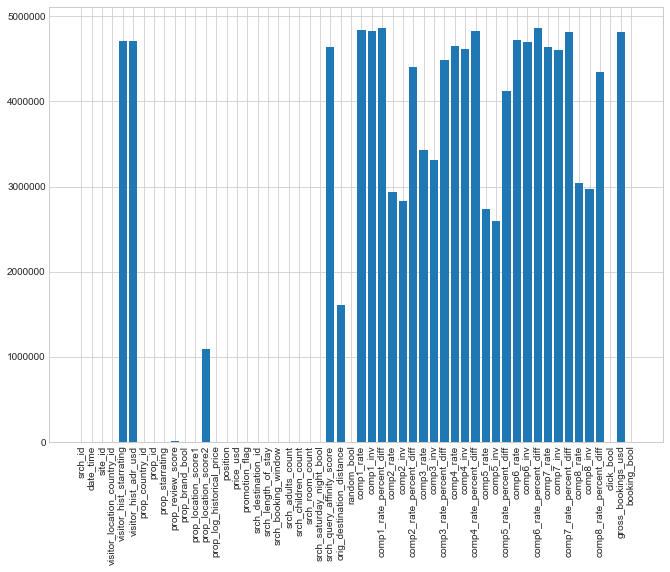

In [3]:
def get_null(prop,data):
    return sum(pd.isnull(data[prop]))

d = {prop: get_null(prop,data) for prop in list(data.keys())}
fig,ax = plt.subplots()
fig.set_size_inches(11,8)
plt.bar(range(len(d)),d.values(),align='center')
plt.xticks(range(len(d)),d.keys(),rotation=90)

#null values in my variables (L)

([<matplotlib.axis.XTick at 0x1bc7e640da0>,
 <a list of 50 Text xticklabel objects>)

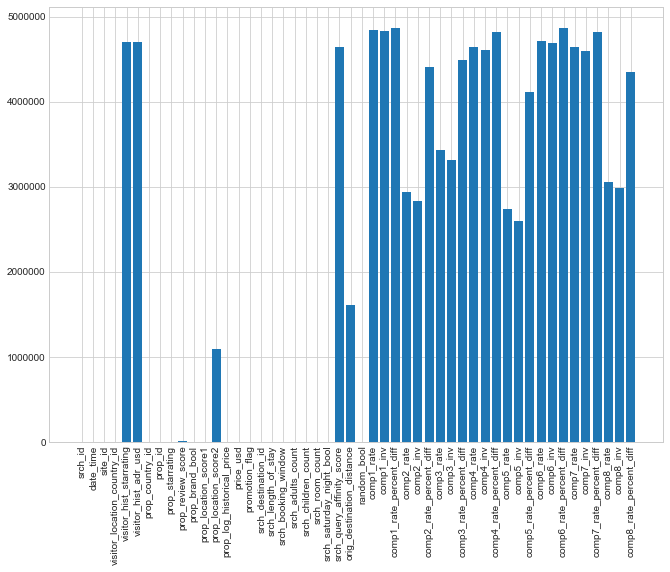

In [4]:
def get_null(prop,test):
    return sum(pd.isnull(test[prop]))

d = {prop: get_null(prop,test) for prop in list(test.keys())}
fig,ax = plt.subplots()
fig.set_size_inches(11,8)
plt.bar(range(len(d)),d.values(),align='center')
plt.xticks(range(len(d)),d.keys(),rotation=90)

#null values in my variables (L)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [104]:
data['visitor_location_country_id'].value_counts()
#data['visitor_location_country_id'].isnull().sum()
#data['visitor_location_country_id'].max()

219    2892489
100     495476
55      290461
216     217385
220     174296
129     123681
31       92636
99       67762
59       62066
92       45213
158      44505
103      35286
132      32740
117      25973
50       19623
39       18430
215      16361
181      12549
98       12024
13       11935
32       11836
15       11501
205      10736
81        9934
4         9428
33        9109
56        9070
23        8632
14        8239
73        8031
        ...   
122         56
27          56
168         55
116         55
46          55
188         55
87          52
139         48
193         47
121         46
183         39
174         33
210         33
166         33
228         33
67          32
94          32
217         31
64          31
3           31
54          31
58          30
198         30
101         28
66          27
226         25
190         24
146         15
83          13
150          8
Name: visitor_location_country_id, Length: 210, dtype: int64

In [113]:
#data['visitor_hist_starrating'].value_counts()
#data['visitor_hist_starrating'].isnull().sum()
data['visitor_hist_starrating'].max()

5.0

In [114]:
#data['visitor_hist_adr_usd'].value_counts()
#data['visitor_hist_adr_usd'].isnull().sum()
data['visitor_hist_adr_usd'].max()

1958.7

In [118]:
#data['prop_country_id'].value_counts()
data['prop_country_id'].isnull().sum()
data['prop_country_id'].min()

1

In [122]:
data['prop_id'].value_counts()
#data['prop_id'].isnull().sum()
data['prop_id'].max()

140821

In [126]:
#data['prop_starrating'].value_counts()
data['prop_starrating'].isnull().sum()
data['prop_starrating'].min()

0

In [130]:
#data['prop_review_score'].value_counts()
#data['prop_review_score'].isnull().sum()
data['prop_review_score'].max()

5.0

In [ ]:
data['prop_brand_bool'].value_counts()
#data['prop_brand_bool'].isnull().sum()
#data['prop_brand_bool'].min()

In [137]:
data['prop_location_score1'].value_counts()
#data['prop_location_score1'].isnull().sum()
#data['prop_location_score1'].max()

0.00    273229
0.69    251968
1.10    227912
1.39    216682
1.61    207619
1.79    175564
1.95    156271
2.08    148716
2.20    129997
2.30    129661
2.40    118447
2.48    106235
2.56    104787
2.64     92192
2.71     87014
2.89     82758
2.77     74621
2.83     72344
2.94     68657
3.09     54465
3.04     51862
3.00     49315
3.14     44812
3.30     36819
3.26     35662
3.43     34976
3.47     34704
3.22     33896
3.50     33387
3.18     32430
         ...  
6.33       454
6.55       444
6.95       440
6.72       415
6.53       410
6.74       327
6.73       317
6.64       303
6.61       287
6.71       273
6.77       253
6.68       237
6.85       232
6.38       225
6.60       196
6.59       191
6.52       175
6.67       171
6.65       154
6.78       136
6.54       132
6.56       122
6.58       122
6.97        97
6.98        69
6.66        48
6.62        39
6.63        38
6.57        27
6.96        15
Name: prop_location_score1, Length: 337, dtype: int64

In [141]:
data['prop_location_score2'].value_counts()
#data['prop_location_score2'].isnull().sum()
#data['prop_location_score2'].min()

0.0002    13100
0.0004    12600
0.0001    12152
0.0003    12063
0.0008    11693
0.0005    11584
0.0006    11111
0.0009    11013
0.0010    10141
0.0007     9822
0.0011     9589
0.0015     9513
0.0022     9156
0.0012     9140
0.0014     8973
0.0013     8929
0.0017     8909
0.0016     8257
0.0019     8061
0.0020     7956
0.0018     7909
0.0023     7842
0.0025     7624
0.0033     7417
0.0028     7370
0.0027     7232
0.0021     7150
0.0030     6984
0.0031     6838
0.0024     6762
          ...  
0.9986        1
0.9137        1
0.9989        1
0.7767        1
0.9979        1
0.6079        1
0.9677        1
0.7836        1
0.9267        1
0.8206        1
0.8180        1
0.6608        1
0.9556        1
0.8748        1
0.8515        1
0.9206        1
0.9032        1
0.9617        1
0.6100        1
0.8974        1
0.9819        1
0.9812        1
0.7600        1
0.8297        1
0.5924        1
0.9354        1
0.9201        1
0.8157        1
0.9980        1
0.7715        1
Name: prop_location_scor

In [147]:
data['prop_log_historical_price'].value_counts()
#data['prop_log_historical_price'].isnull().sum()
#data['prop_log_historical_price'].max()

0.00    713899
6.21     88837
5.02     36267
5.07     35177
4.98     35118
4.95     34935
4.92     34918
4.93     34798
5.03     34664
4.85     34463
4.94     34014
4.88     33825
4.96     33811
4.91     33752
4.89     33327
5.05     33220
4.86     33193
4.90     32974
4.99     32959
5.00     32842
5.01     32783
5.06     32720
4.97     32646
4.87     32488
5.04     32465
5.13     31940
4.79     31749
4.84     31713
5.09     31523
5.08     31451
         ...  
2.86         5
2.72         4
2.25         4
2.84         4
2.42         4
2.47         4
2.29         3
2.58         3
2.63         3
2.80         3
2.48         3
2.59         2
2.30         2
2.51         2
2.57         2
1.95         2
2.19         1
2.20         1
2.08         1
1.68         1
1.91         1
2.09         1
2.34         1
2.49         1
2.21         1
2.31         1
2.55         1
2.26         1
1.67         1
2.54         1
Name: prop_log_historical_price, Length: 392, dtype: int64

In [153]:
data['position'].value_counts()
#data['position'].isnull().sum()
#data['position'].max()

1     199415
3     199355
2     199350
6     199172
7     194769
4     193406
8     190375
9     186236
12    178279
13    174815
10    173451
14    171160
15    167552
18    160544
19    157174
16    154699
20    153861
21    150530
24    143693
25    140267
22    138058
26    136850
27    133549
28    130260
29    126879
30    123017
31    118672
32    111617
33    105601
34     99121
35     87619
36     67011
37     36866
17     11353
11     11277
23     10835
38     10704
5       9312
39      1577
40        66
Name: position, dtype: int64

In [157]:
data['price_usd'].value_counts()
#data['price_usd'].isnull().sum()
#data['price_usd'].max()

99.00       76129
119.00      65077
109.00      64317
89.00       62561
129.00      56130
139.00      52188
149.00      48791
79.00       47407
159.00      45336
80.00       43818
169.00      41554
90.00       39966
70.00       38799
179.00      38026
60.00       37554
199.00      37261
110.00      34047
85.00       33935
69.00       33043
100.00      32427
189.00      31795
65.00       31475
75.00       31423
59.00       31224
55.00       31095
95.00       28991
84.00       26583
50.00       25979
120.00      24274
76.00       24069
            ...  
1021.36         1
2586.09         1
1307.25         1
706.33          1
706.08          1
995.86          1
1627.26         1
709.92          1
1317.75         1
995.39          1
632.94          1
631.06          1
710.92          1
1623.86         1
13064.00        1
709.83          1
992.11          1
1318.00         1
711.17          1
993.39          1
632.19          1
1317.00         1
711.33          1
631.81          1
1621.86   

In [161]:
#data['promotion_flag'].value_counts()
data['promotion_flag'].isnull().sum()
#data['promotion_flag'].max()

0

In [180]:
#data['comp8_rate'].value_counts()
data['comp8_rate'].isnull().sum()
#data['prop_log_historical_price'].max()

3041693

In [197]:
#data['comp8_inv'].value_counts()
data['comp8_inv'].isnull().sum()
#data['comp1_inv'].max()

2970844

In [236]:
#data['comp8_rate_percent_diff'].value_counts()
data['comp8_rate_percent_diff'].isnull().sum()
#data['comp8_rate_percent_diff'].max()

4343617

In [238]:
data['click_bool'].value_counts()
#data['click_bool'].isnull().sum()
#data['click_bool'].max()

0    4736468
1     221879
Name: click_bool, dtype: int64

In [243]:
#data['gross_bookings_usd'].value_counts()
#data['gross_bookings_usd'].isnull().sum()
data['gross_bookings_usd'].max()

159292.38

In [245]:
data['booking_bool'].value_counts()
#data['booking_bool'].isnull().sum()


0    4819957
1     138390
Name: booking_bool, dtype: int64

In [260]:
#data['srch_id'].value_counts()
data['srch_id'].isnull().sum()
#data['srch_id'].max()

0

In [264]:
#data['date_time'].value_counts()
data['date_time'].isnull().sum()
#data['date_time'].max()

0

PREPROCESSINNNNNN ehehehehe

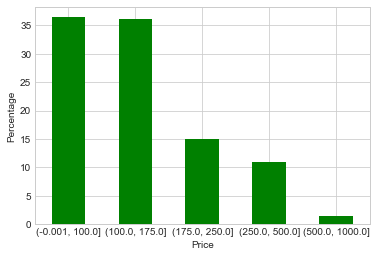

In [22]:
#price=data['price_usd']

#out = pd.cut(price, bins=[0, 100, 175, 250, 500, 1000], include_lowest=True)
#ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
#plt.show()

#percentage of bins 
out = pd.cut(price, bins=[0, 100, 175, 250, 500, 1000], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="g", figsize=(6,4))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.ylabel("Percentage")
plt.xlabel("Price")
plt.show()

TypeError: 'pandas._libs.interval.Interval' object is not subscriptable

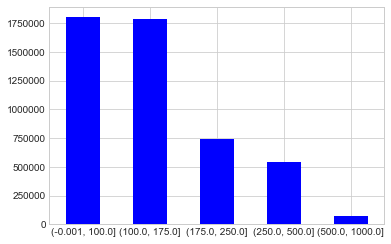

In [15]:
price=data['price_usd']

out = pd.cut(price, bins=[0, 100, 175, 250, 500, 1000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

In [11]:
price=data['price_usd']

out = pd.cut(price, bins=[0, 100, 175, 250, 500, 1000], include_lowest=True)

print(out)

0           (100.0, 175.0]
1           (100.0, 175.0]
2           (175.0, 250.0]
3          (500.0, 1000.0]
4           (100.0, 175.0]
5           (175.0, 250.0]
6           (100.0, 175.0]
7          (-0.001, 100.0]
8           (100.0, 175.0]
9           (250.0, 500.0]
10          (175.0, 250.0]
11          (100.0, 175.0]
12          (100.0, 175.0]
13          (175.0, 250.0]
14          (100.0, 175.0]
15          (100.0, 175.0]
16          (100.0, 175.0]
17          (100.0, 175.0]
18          (100.0, 175.0]
19          (175.0, 250.0]
20          (100.0, 175.0]
21          (100.0, 175.0]
22          (100.0, 175.0]
23          (100.0, 175.0]
24          (175.0, 250.0]
25          (100.0, 175.0]
26          (100.0, 175.0]
27          (175.0, 250.0]
28          (250.0, 500.0]
29          (250.0, 500.0]
                ...       
4958317     (100.0, 175.0]
4958318     (100.0, 175.0]
4958319     (100.0, 175.0]
4958320     (100.0, 175.0]
4958321     (100.0, 175.0]
4958322     (175.0, 250.0]
4

In [7]:
data.cov(min_periods=None)

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
srch_id,9.237561e+09,2447.805022,-38629.047097,-701.484029,3285.710971,-35921.118715,-6.461545e+05,-159.293043,-298.726206,-177.174924,...,23323.339487,-162.045179,85.860424,18276.714628,3.289889,-20.867486,72388.495358,3.851040,75115.054771,7.709545
site_id,2.447805e+03,58.474923,-154.200896,1.774237,88.117228,-163.370265,9.137700e+02,1.405243,-0.575251,-0.722487,...,-1.379382,-0.005118,-0.027100,-1.873423,0.031257,-0.005508,0.735104,0.013434,332.469792,-0.001705
visitor_location_country_id,-3.862905e+04,-154.200896,4344.951928,-12.846665,-568.594257,2174.985474,1.155146e+03,-7.822447,4.449590,5.789467,...,-27.425998,0.182654,-0.141042,-68.992983,-0.390535,0.106264,-71.538224,-0.065497,-2591.346278,0.027401
visitor_hist_starrating,-7.014840e+02,1.774237,-12.846665,0.479582,37.075974,-14.475525,2.231467e+02,0.219616,-0.000630,-0.061588,...,0.047032,-0.000380,-0.000959,-0.048693,0.011197,0.000043,2.706175,0.000362,162.615296,-0.000264
visitor_hist_adr_usd,3.285711e+03,88.117228,-568.594257,37.075974,11503.526222,-577.292375,2.506701e+03,17.716232,5.548796,-2.977381,...,-33.567867,0.283555,0.379892,-51.240781,0.306682,-0.043903,283.069171,0.085129,26992.324767,0.012042
prop_country_id,-3.592112e+04,-163.370265,2174.985474,-14.475525,-577.292375,4671.072923,4.485906e+02,-11.617375,6.651835,10.218098,...,-67.995203,-0.235457,-1.096857,-74.013890,-0.522972,0.082784,-85.349781,-0.087925,-3575.813403,0.013818
prop_id,-6.461545e+05,913.770028,1155.146249,223.146705,2506.700794,448.590588,1.649166e+09,108.958137,-4.383940,18.035217,...,15320.364435,-131.383604,-27.779454,17120.447770,57.123261,25.071411,-72525.590632,2.069166,90710.639142,-3.399232
prop_starrating,-1.592930e+02,1.405243,-7.822447,0.219616,17.716232,-11.617375,1.089581e+02,1.104651,0.338032,0.010794,...,-0.772670,-0.008923,-0.008532,-0.557709,0.015408,-0.005534,13.739669,0.006690,136.851367,0.003671
prop_review_score,-2.987262e+02,-0.575251,4.449590,-0.000630,5.548796,6.651835,-4.383940e+00,0.338032,1.103190,0.103110,...,-0.617029,-0.003807,0.000953,-0.460561,0.022878,-0.000983,4.757875,0.005087,50.389529,0.004465
prop_brand_bool,-1.771749e+02,-0.722487,5.789467,-0.061588,-2.977381,10.218098,1.803522e+01,0.010794,0.103110,0.231856,...,-1.363401,-0.000746,-0.009894,-1.003733,-0.002120,-0.004730,-0.543783,0.000086,-12.878983,0.000792


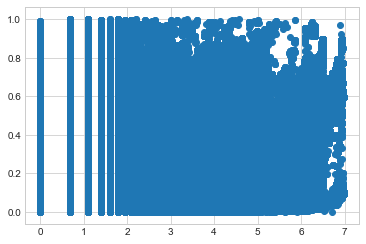

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data['prop_location_score1'], data['prop_location_score2'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.

In [17]:
data_prop = data[['prop_location_score1','prop_location_score2']]
data_prop.corr(method='pearson')

,prop_location_score1,prop_location_score2
prop_location_score1,1.000000,0.435983
prop_location_score2,0.435983,1.000000


In [4]:
train=data.drop(['srch_id','visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'gross_bookings_usd' ], axis=1)


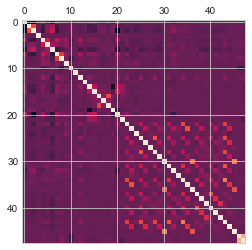

In [23]:
plt.matshow(train.corr())

In [ ]:
pandas.plotting.scatter_matrix(train, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [ ]:
sns.pairplot(train)

In [ ]:
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)